In [7]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
from shapely.plotting import plot_polygon

import xarray as xr

In [8]:
cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

In [38]:
NG = [49.727, -124.68]
S415 = [49.25, -123.667];

In [4]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
mask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

In [21]:
def def_polys():
    # boxes from Vicente: Regions_functions_V2.py
    # Northern Strait Subregion Northwest
    Nx1_1, Ny1_1 = [132,170], [665,680]
    Nx1_2, Ny1_2 = [170,200], [680,620]
    Nx1_3, Ny1_3 = [135,200], [620,620]

    # Southern Strait: Subregion North
    Sx1_1, Sy1_1 = [202,292], [505,505]
    Sx1_2, Sy1_2 = [300,315], [505,480]   # not used
    Sx1_3, Sy1_3 = [210,238], [500,465]   # not used
    Sx1_4, Sy1_4 = [238,245], [465,410]
    Sx1_5, Sy1_5 = [302, 280], [410, 470]
    Sx1_6, Sy1_6 = [245,302], [410,410]    # not used
    
    N1_lon_1, N1_lat_1 = [mask.nav_lon[Ny1_1[0],Nx1_1[0]].values, mask.nav_lon[Ny1_1[1],Nx1_1[1]].values], [mask.nav_lat[Ny1_1[0],Nx1_1[0]].values, mask.nav_lat[Ny1_1[1],Nx1_1[1]].values]
    N1_lon_2, N1_lat_2 = [mask.nav_lon[Ny1_2[0],Nx1_2[0]].values, mask.nav_lon[Ny1_2[1],Nx1_2[1]].values], [mask.nav_lat[Ny1_2[0],Nx1_2[0]].values, mask.nav_lat[Ny1_2[1],Nx1_2[1]].values]
    N1_lon_3, N1_lat_3 = [mask.nav_lon[Ny1_3[0],Nx1_3[0]].values, mask.nav_lon[Ny1_3[1],Nx1_3[1]].values], [mask.nav_lat[Ny1_3[0],Nx1_3[0]].values, mask.nav_lat[Ny1_3[1],Nx1_3[1]].values]

    S1_lon_1, S1_lat_1 = [mask.nav_lon[Sy1_1[0],Sx1_1[0]].values, mask.nav_lon[Sy1_1[1],Sx1_1[1]].values], [mask.nav_lat[Sy1_1[0],Sx1_1[0]].values, mask.nav_lat[Sy1_1[1],Sx1_1[1]].values]
    S1_lon_2, S1_lat_2 = [mask.nav_lon[Sy1_2[0],Sx1_2[0]].values, mask.nav_lon[Sy1_2[1],Sx1_2[1]].values], [mask.nav_lat[Sy1_2[0],Sx1_2[0]].values, mask.nav_lat[Sy1_2[1],Sx1_2[1]].values]
    S1_lon_3, S1_lat_3 = [mask.nav_lon[Sy1_3[0],Sx1_3[0]].values, mask.nav_lon[Sy1_3[1],Sx1_3[1]].values], [mask.nav_lat[Sy1_3[0],Sx1_3[0]].values, mask.nav_lat[Sy1_3[1],Sx1_3[1]].values]
    S1_lon_4, S1_lat_4 = [mask.nav_lon[Sy1_4[0],Sx1_4[0]].values, mask.nav_lon[Sy1_4[1],Sx1_4[1]].values], [mask.nav_lat[Sy1_4[0],Sx1_4[0]].values, mask.nav_lat[Sy1_4[1],Sx1_4[1]].values]
    S1_lon_5, S1_lat_5 = [mask.nav_lon[Sy1_5[0],Sx1_5[0]].values, mask.nav_lon[Sy1_5[1],Sx1_5[1]].values], [mask.nav_lat[Sy1_5[0],Sx1_5[0]].values, mask.nav_lat[Sy1_5[1],Sx1_5[1]].values]
    S1_lon_6, S1_lat_6 = [mask.nav_lon[Sy1_6[0],Sx1_6[0]].values, mask.nav_lon[Sy1_6[1],Sx1_6[1]].values], [mask.nav_lat[Sy1_6[0],Sx1_6[0]].values, mask.nav_lat[Sy1_6[1],Sx1_6[1]].values]

    polygon_lon_lat_N1 = [
    (N1_lon_1[0], N1_lat_1[0]),
    (N1_lon_1[1], N1_lat_1[1]),
    (N1_lon_2[1], N1_lat_2[1]),
    (N1_lon_3[1], N1_lat_3[1]),
    (N1_lon_3[0], N1_lat_3[0])
    ]
    polygon_coors_N1 = Polygon(polygon_lon_lat_N1)

    polygon_lon_lat_S1 = [
    (S1_lon_1[0], S1_lat_1[0]),
    (S1_lon_1[1], S1_lat_1[1]),
#    (S1_lon_2[1], S1_lat_2[1]),
    (S1_lon_5[1], S1_lat_5[1]),
#    (S1_lon_6[1], S1_lat_6[1]),
#    (S1_lon_6[0], S1_lat_6[0]),
    (S1_lon_4[0], S1_lat_4[0])
    ]
    polygon_coors_S1 = Polygon(polygon_lon_lat_S1)

    polygon_lon_lat_S2 = [
    (S1_lon_1[0], S1_lat_1[0]),
    (S1_lon_1[1], S1_lat_1[1]),
    (S1_lon_2[1], S1_lat_2[1]),
    (S1_lon_5[1], S1_lat_5[1]),
    (S1_lon_6[1], S1_lat_6[1]),
    (S1_lon_6[0], S1_lat_6[0]),
    (S1_lon_4[0], S1_lat_4[0])
    ]
    polygon_coors_S2 = Polygon(polygon_lon_lat_S2)

    return polygon_coors_N1, polygon_coors_S1, polygon_coors_S2

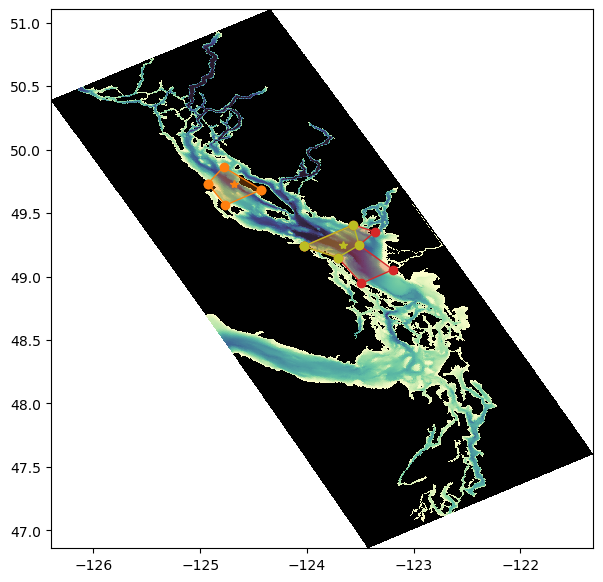

In [43]:
polygon_coors_N1, polygon_coors_S1, polygon_coors_S2 = def_polys()
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry[:-1, :-1], cmap=cm_deep)

plot_polygon(polygon_coors_N1, ax=ax, edgecolor='tab:orange', color='tab:orange')
plot_polygon(polygon_coors_S2, ax=ax, edgecolor='tab:red', color='tab:red');
plot_polygon(polygon_coors_S1, ax=ax, edgecolor='tab:olive', color='tab:olive');

ax.plot(NG[1], NG[0], '*', c='tab:orange')
ax.plot(S415[1], S415[0], '*', c='tab:olive');

In [37]:
def find_poly_volume(maxk=25):
    print (f'Including cells that are deeper than {mask.gdepw_1d[maxk]} m')
    print (f'Shallowest cell centre is {mask.gdept_1d[maxk]} m')
    polygon_coors_N1, polygon_coors_S1, polygon_coors_S2 = def_polys()

    my_mask_N = np.zeros((898, 398))
    my_mask_S1 = np.zeros_like(my_mask_N)
    my_mask_S2 = np.zeros_like(my_mask_N)

    for ii in range(600, 700):
        for jj in range (100, 205):
            if (Point(bathy.nav_lon[ii, jj].values, bathy.nav_lat[ii, jj].values)).within(polygon_coors_N1):
                my_mask_N[ii, jj] = 1

    for ii in range(400, 510):
        for jj in range (200, 350):
            if (Point(bathy.nav_lon[ii, jj].values, bathy.nav_lat[ii, jj].values)).within(polygon_coors_S1):
                my_mask_S1[ii, jj] = 1

    for ii in range(400, 510):
        for jj in range (200, 350):
            if (Point(bathy.nav_lon[ii, jj].values, bathy.nav_lat[ii, jj].values)).within(polygon_coors_S2):
                my_mask_S2[ii, jj] = 1

    volume_N = mask.tmask[0, maxk:] * my_mask_N * mask.e1t[0] * mask.e2t[0] * mask.e3t_0[0, maxk:]
    volume_S1 = mask.tmask[0, maxk:] * my_mask_S1 * mask.e1t[0] * mask.e2t[0] * mask.e3t_0[0, maxk:]
    volume_S2 = mask.tmask[0, maxk:] * my_mask_S1 * mask.e1t[0] * mask.e2t[0] * mask.e3t_0[0, maxk:]
    return volume_N, volume_S1, volume_S2()

In [33]:
mask.gdept_1d.values[0][25:]

array([ 76.58558445,  98.06295924, 121.8665184 , 147.08945807,
       173.11448217, 199.57304923, 226.26030574, 253.06663733,
       279.93454976, 306.83419736, 333.75016973, 360.6745318 ,
       387.60320347, 414.53408835, 441.46610968])

In [36]:
print (mask.gdepw_1d[0, 25].values)

67.05207423948595
